In [1]:
import pandas as pd
pd.options.display.max_columns = 100

In [2]:
GYD_key_geno_feat_assoc_odds = pd.read_pickle("./data/GYD_key_geno_feat_assoc_odds.pkl")
GYD_key_geno_feat_assoc_odds

condition,glycerol(2.5),37 celsius,NaCl(0.5g/L) trace elements,WT,511145,M9,NH4Cl(1),KH2PO4(3) Na2HPO4(6.8),MgSO4(0.24),CaCl2(0.1)
mutated features,,,,,,,,,,
crr,6.478355,0,0,0,0,0,0,0,0,0
cyaA,8.858277,0,0,0,0,0,0,0,0,0
glpK,10.210345,0,0,0,0,0,0,0,0,0
hisLGDCBHAFI attenuator terminator,8.343750,0,0,0,0,0,0,0,0,0
leuLABCD attenuator terminator,9.740310,0,0,0,0,0,0,0,0,0


In [3]:
GYD_key_reg_assoc_odds = pd.read_pickle("./data/GYD_key_reg_assoc_odds.pkl")
GYD_key_reg_assoc_odds

condition,glycerol(2.5),37 celsius,NaCl(0.5g/L) trace elements,WT,511145,M9,NH4Cl(1),KH2PO4(3) Na2HPO4(6.8),MgSO4(0.24),CaCl2(0.1)
mutated features,,,,,,,,,,
CRP,2.875480,0,0,0,0,0,0,0,0,0
GlpR,8.285115,0,0,0,0,0,0,0,0,0
Mlc,3.771588,0,0,0,0,0,0,0,0,0


In [4]:
odds_df = pd.concat([GYD_key_geno_feat_assoc_odds, GYD_key_reg_assoc_odds])
odds_df

condition,glycerol(2.5),37 celsius,NaCl(0.5g/L) trace elements,WT,511145,M9,NH4Cl(1),KH2PO4(3) Na2HPO4(6.8),MgSO4(0.24),CaCl2(0.1)
mutated features,,,,,,,,,,
crr,6.478355,0,0,0,0,0,0,0,0,0
cyaA,8.858277,0,0,0,0,0,0,0,0,0
glpK,10.210345,0,0,0,0,0,0,0,0,0
hisLGDCBHAFI attenuator terminator,8.343750,0,0,0,0,0,0,0,0,0
leuLABCD attenuator terminator,9.740310,0,0,0,0,0,0,0,0,0
CRP,2.875480,0,0,0,0,0,0,0,0,0
GlpR,8.285115,0,0,0,0,0,0,0,0,0
Mlc,3.771588,0,0,0,0,0,0,0,0,0


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

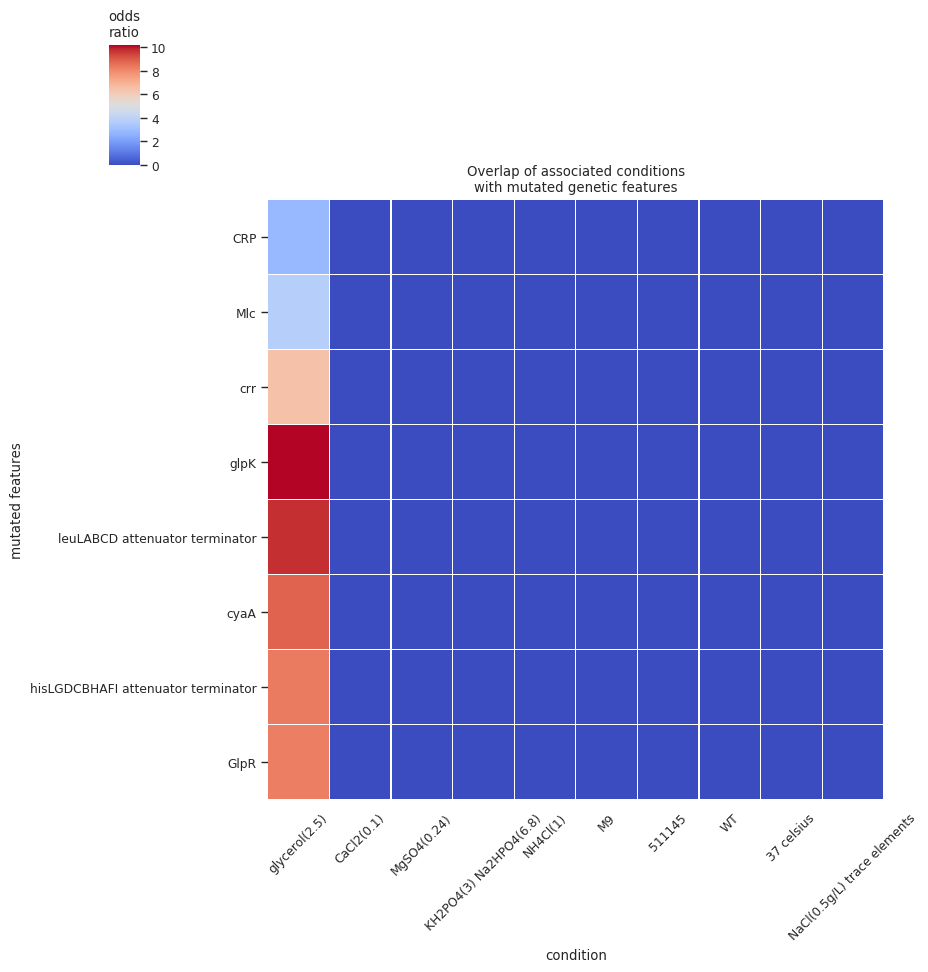

In [5]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.dpi"] = 100
sns.set_context("paper")
sns.set_style("white")

g = sns.clustermap(
    odds_df,
    linewidths=0.1,
    cmap="coolwarm",
#     xticklabels=False,
#     yticklabels=False,
#     figsize=(2,4.5)
#     figsize=(4,2)
)

# Fix for recent matplotlib/seaborn issue
g.ax_heatmap.set_ylim(len(odds_df)+0, -0)

# g.cax.set_visible(False)
g.ax_row_dendrogram.set_visible(False)
g.ax_col_dendrogram.set_visible(False)

# g.fig.suptitle("Significantly mutated genetic features\nand their significantly associated conditions")
g.cax.set_title("odds\nratio")

g.ax_heatmap.set_title(
    "Overlap of associated conditions\nwith mutated genetic features",
)
# g.cax.yaxis.set_ticks_position("left")
g.ax_heatmap.yaxis.set_ticks_position("left")
# g.cax.yaxis.set_label_position("left")
g.ax_heatmap.yaxis.set_label_position("left")

# dendro_box = g.ax_row_dendrogram.get_position()
# dendro_box.x0-=0.2
# dendro_box.x1-=0.2
# g.cax.set_position(dendro_box)


# g.clustermap.set_xticklabels(
#     g.get_xticklabels(),
#     rotation=45,
#     horizontalalignment='right',
#     verticalalignment='center',
#     rotation_mode='anchor'
# )
# g.clustermap.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')
# g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.setp(
    g.ax_heatmap.get_xticklabels(),
#         horizontalalignment='right',
#     verticalalignment='center',
#     rotation_mode='anchor',
    rotation=45
)
# plt.savefig("fig.svg", format="svg")

In [6]:
# display(g.dendrogram_row.reordered_ind, g.dendrogram_col.reordered_ind)
l = list(odds_df.index[g.dendrogram_row.reordered_ind])
odds_df = odds_df.reindex(l)  # reorganizing rows

In [7]:
odds_df = odds_df.rename(index={
'CRP': 'CRP regulon',
 'Mlc': 'Mlc regulon',
 'crr': '$\it{crr}$',
 'glpK': '$\it{glpK}$',
 'leuLABCD attenuator terminator': '$\it{leuLABCD}$ att',
 'cyaA': '$\it{cyaA}$',
 'hisLGDCBHAFI attenuator terminator': '$\it{hisLGDCBHAFI}$ att',
 'GlpR': 'GlpR regulon'
 })
odds_df

condition,glycerol(2.5),37 celsius,NaCl(0.5g/L) trace elements,WT,511145,M9,NH4Cl(1),KH2PO4(3) Na2HPO4(6.8),MgSO4(0.24),CaCl2(0.1)
mutated features,,,,,,,,,,
CRP regulon,2.875480,0,0,0,0,0,0,0,0,0
Mlc regulon,3.771588,0,0,0,0,0,0,0,0,0
$\it{crr}$,6.478355,0,0,0,0,0,0,0,0,0
$\it{glpK}$,10.210345,0,0,0,0,0,0,0,0,0
$\it{leuLABCD}$ att,9.740310,0,0,0,0,0,0,0,0,0
$\it{cyaA}$,8.858277,0,0,0,0,0,0,0,0,0
$\it{hisLGDCBHAFI}$ att,8.343750,0,0,0,0,0,0,0,0,0
GlpR regulon,8.285115,0,0,0,0,0,0,0,0,0


In [8]:
odds_df.columns

Index(['glycerol(2.5)', '37 celsius', 'NaCl(0.5g/L) trace elements', 'WT',
       '511145', 'M9', 'NH4Cl(1)', 'KH2PO4(3) Na2HPO4(6.8)', 'MgSO4(0.24)',
       'CaCl2(0.1)'],
      dtype='object', name='condition')

In [9]:
# # in case I want to automatically wrap text.
# import numpy as np
# import textwrap
# mean_length = np.mean([len(i) for i in odds_df.columns])
# mean_length
# ["\n".join(textwrap.wrap(i,mean_length)) for i in odds_df.columns]


# odds_df = odds_df.set_axis(
# ['glycerol(2.5g/L) carbon\nsource',
#  '37 celsius',
#  'BOP27 starting strain',
#  'M9 minimal media',
#  'NH4Cl(1g/L) nitrogen\nsource',
#  'KH2PO4(2g/L) phosphorus\nsource',
#  'MgSO4(0.24g/L) sulfur\nsource'],
#     axis=1,
#     inplace=False
# )

In [10]:
conds_d = {
    'glycerol(2.5)': 'C',
    'WT': 'S',
    '37 celsius': 'T',
    'M9': "M",
    'NH4Cl(1)': 'N',
    'KH2PO4(3) Na2HPO4(6.8)': 'P',
    'MgSO4(0.24)': 'Su',
    'CaCl2(0.1)': 'Ca',
    '511145': 'O',
    "NaCl(0.5g/L) trace elements": 'Sp'
}


leg = 'C: glycerol(2.5g/L) carbon source\n' + \
    'S: WT starting strain\n' + \
    'T: 37 Celsius\n' + \
    'M: M9 minimal media\n' + \
    'N: NH4Cl(1g/L) nitrogen source\n' + \
    'P: KH2PO4(3g/L) & Na2HPO4(6.8g/L) phosphorus source\n' + \
    'Su: MgSO4(0.24g/L) sulfur source\n' + \
    'Ca: CaCl2(0.1g/L) calcium source\n' + \
    'O: $\it{E. coli}$ K-12 MG1655\n' + \
    'Sp: NaCl(0.5g/L) & trace elements'
leg

'C: glycerol(2.5g/L) carbon source\nS: WT starting strain\nT: 37 Celsius\nM: M9 minimal media\nN: NH4Cl(1g/L) nitrogen source\nP: KH2PO4(3g/L) & Na2HPO4(6.8g/L) phosphorus source\nSu: MgSO4(0.24g/L) sulfur source\nCa: CaCl2(0.1g/L) calcium source\nO: $\\it{E. coli}$ K-12 MG1655\nSp: NaCl(0.5g/L) & trace elements'

In [11]:
df = odds_df.copy()
df = df.rename(columns=conds_d)
df

condition,C,T,Sp,S,O,M,N,P,Su,Ca
mutated features,,,,,,,,,,
CRP regulon,2.875480,0,0,0,0,0,0,0,0,0
Mlc regulon,3.771588,0,0,0,0,0,0,0,0,0
$\it{crr}$,6.478355,0,0,0,0,0,0,0,0,0
$\it{glpK}$,10.210345,0,0,0,0,0,0,0,0,0
$\it{leuLABCD}$ att,9.740310,0,0,0,0,0,0,0,0,0
$\it{cyaA}$,8.858277,0,0,0,0,0,0,0,0,0
$\it{hisLGDCBHAFI}$ att,8.343750,0,0,0,0,0,0,0,0,0
GlpR regulon,8.285115,0,0,0,0,0,0,0,0,0


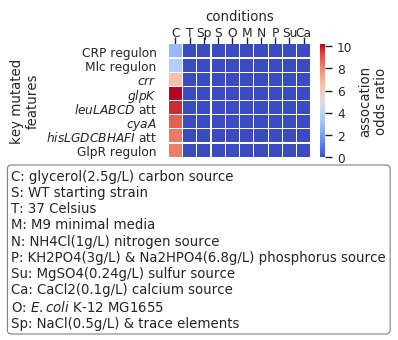

In [12]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.dpi"] = 100
sns.set_context("paper")
sns.set_style("white")

plt.figure(
    #     figsize=(3, 3.5)
    #     figsize=(6, 1.5)
    figsize=(2.3, 1.5)
)
ax = sns.heatmap(
    df,
    linewidths=0.1,
    cmap="coolwarm",
    cbar_kws={
        #         "shrink": 0.8,
        "label": "assocation\nodds ratio"
    }
)

plt.ylabel('key mutated\nfeatures')
plt.xlabel('conditions')

# fix for seaborn/matplotlib bug
b, t = plt.ylim()  # discover the values for bottom and top
b += 0.5  # Add 0.5 to the bottom
t -= 0.5  # Subtract 0.5 from the top
plt.ylim(b, t)  # update the ylim(bottom, top) values


bbox_props = dict(
    boxstyle="round",
    fc="w",
    ec="0.5",
    #     alpha=0.9
)
ax.annotate(
    leg,
#     xy=(-1.3, -1),
    xy=(-1.1, -1.5),
    xycoords='axes fraction',
    #             textcoords='offset points',
    #             size=14,
    bbox=bbox_props
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    #     rotation=45,
    #     horizontalalignment='right',
    verticalalignment='center',
    #     rotation_mode='anchor'
    #     position='top'
)

# ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')
ax.xaxis.set_ticks_position('top')


plt.savefig("fig.svg", format="svg")
plt.show()

In [116]:
# # in case I want to automatically wrap text.
# import textwrap
# mean_length = np.mean([len(i) for i in odds_df.columns])
# mean_length
# ["\n".join(textwrap.wrap(i,mean_length)) for i in odds_df.columns]


odds_df = odds_df.rename(columns={
    'glycerol(2.5)': 'glycerol(2.5g/L)\ncarbon source',
    'BOP27': 'BOP27\nstarting strain',
    '37 celsius': '37 Celsius',
     'M9': "M9\nminimal media",
     'NH4Cl(1)': 'NH4Cl(1g/L)\nnitrogen source',
     'KH2PO4(2)': 'KH2PO4(2g/L)\nphosphorus source',
     'MgSO4(0.24)': 'MgSO4(0.24g/L)\nsulfur source'
})
odds_df

condition,glycerol(2.5g/L)\ncarbon source,37 Celsius,NaCl(0.5g/L) trace elements,WT,511145,M9\nminimal media,NH4Cl(1g/L)\nnitrogen source,KH2PO4(3) Na2HPO4(6.8),MgSO4(0.24g/L)\nsulfur source,CaCl2(0.1)
mutated features,,,,,,,,,,
CRP regulon,2.875480,0,0,0,0,0,0,0,0,0
Mlc regulon,3.771588,0,0,0,0,0,0,0,0,0
$\it{crr}$,6.478355,0,0,0,0,0,0,0,0,0
$\it{glpK}$,10.210345,0,0,0,0,0,0,0,0,0
$\it{leuLABCD}$ att,9.740310,0,0,0,0,0,0,0,0,0
$\it{cyaA}$,8.858277,0,0,0,0,0,0,0,0,0
$\it{hisLGDCBHAFI}$ att,8.343750,0,0,0,0,0,0,0,0,0
GlpR regulon,8.285115,0,0,0,0,0,0,0,0,0


In [117]:
# # in case I want to automatically wrap text.
# import numpy as np
# import textwrap
# mean_length = np.mean([len(i) for i in odds_df.columns])
# mean_length
# ["\n".join(textwrap.wrap(i,mean_length)) for i in odds_df.columns]


odds_df = odds_df.set_axis(
['glycerol(2.5g/L) carbon\nsource',
 '37 celsius',
 'BOP27 starting strain',
 'M9 minimal media',
 'NH4Cl(1g/L) nitrogen\nsource',
 'KH2PO4(2g/L) phosphorus\nsource',
 'MgSO4(0.24g/L) sulfur\nsource',
 'CaCl2(0.1g/L) calcium source'
],
    axis=1,
    inplace=False
)

ValueError: Length mismatch: Expected axis has 10 elements, new values have 8 elements

In [ ]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.dpi"] = 100
sns.set_context("paper")
sns.set_style("white")

plt.figure(
    figsize=(3, 3.5)
#     figsize=(6, 1.5)
#     figsize=(1.8, 1.5)
)
ax = sns.heatmap(
        odds_df.T,
    linewidths=0.1,
    cmap="coolwarm",
)

plt.xlabel('key mutated\nfeatures')
plt.ylabel('conditions')

# fix for seaborn/matplotlib bug
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right',
    verticalalignment='center',
    rotation_mode='anchor'
)

plt.savefig("fig.svg", format="svg")
plt.show()

In [ ]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.dpi"] = 100
sns.set_context("paper")
sns.set_style("white")

plt.figure(
#     figsize=(3, 3.5)
#     figsize=(6, 1.5)
    figsize=(7, 2)
)
ax = sns.heatmap(
    odds_df,
    linewidths=0.1,
    cmap="coolwarm",
)

plt.ylabel('key mutated\nfeatures')
plt.xlabel('conditions')

# fix for seaborn/matplotlib bug
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
#     horizontalalignment='right',
#     verticalalignment='center',
#     rotation_mode='anchor'
)

plt.savefig("fig.svg", format="svg")
plt.show()

In [ ]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.dpi"] = 100
sns.set_context("paper")
sns.set_style("white")

g = sns.clustermap(
    odds_df,
    linewidths=0.1,
    cmap="coolwarm",
#     xticklabels=False,
#     yticklabels=False,
#     figsize=(6,6)
#     figsize=(4,2)
)

# Fix for recent matplotlib/seaborn issue
g.ax_heatmap.set_ylim(len(odds_df)+0, -0)

# g.cax.set_visible(False)
g.ax_row_dendrogram.set_visible(False)
g.ax_col_dendrogram.set_visible(False)

# g.fig.suptitle("Significantly mutated genetic features\nand their significantly associated conditions")
g.cax.set_title("odds\nratio")

g.ax_heatmap.set_title(
    "Overlap of associated conditions\nwith mutated genetic features",
)
# g.cax.yaxis.set_ticks_position("left")
g.ax_heatmap.yaxis.set_ticks_position("left")
# g.cax.yaxis.set_label_position("left")
g.ax_heatmap.yaxis.set_label_position("left")

dendro_box = g.ax_row_dendrogram.get_position()
dendro_box.x0-=0.2
dendro_box.x1-=0.2
g.cax.set_position(dendro_box)


# g.clustermap.set_xticklabels(
#     g.get_xticklabels(),
#     rotation=45,
#     horizontalalignment='right',
#     verticalalignment='center',
#     rotation_mode='anchor'
# )
# g.clustermap.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')
# g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.setp(
    g.ax_heatmap.get_xticklabels(),
#         horizontalalignment='right',
#     verticalalignment='center',
#     rotation_mode='anchor',
    rotation=45
)
# plt.savefig("fig.svg", format="svg")